In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

# Loading and Preparing the Data

In [2]:
mi_h=pd.read_csv("DEMsExpression.csv")
cad=pd.read_csv("MI-Healthy DEMs Expression of CAD samples.csv")
df=pd.concat([mi_h, cad], axis=0)

target = []
for sample in df['Unnamed: 0']:
    if sample[-1] == "H":
        target.append("Healthy")
    elif sample[-1] == "M":
        target.append("MI")
    elif sample[-1] == "C":
        target.append("CAD")

df["MI status"] = target
df.drop('Unnamed: 0', axis=1, inplace = True)

In [3]:
df.head()

,7900488 / MIR30E,7923976 / C1orf132///MIR29B2,7971661 / MIR15A,7976832 / MIR323A,8008885 / MIR21,8045453 / MIR128-1,8084755 / MIR28,8087881 / MIRLET7G,8163107 / MIR32,8175248 / MIR92A2,MI status
0,5.86237,4.17884,5.93182,3.31011,8.79683,4.71189,3.45519,7.52580,6.67709,3.16477,Healthy
1,5.61056,3.90262,6.09685,3.54984,9.09161,4.82916,3.52235,7.55883,6.60037,3.14140,Healthy
2,6.47634,4.42823,6.45591,3.78296,9.46479,4.56398,3.64562,7.69815,6.91699,3.05517,Healthy
3,6.29086,4.16566,6.38480,3.47636,9.16028,4.41579,3.72838,7.59828,6.30052,3.05037,Healthy
4,5.42813,3.83066,6.30655,3.82938,8.31414,4.49369,3.53013,7.36374,6.18958,2.99243,Healthy


In [4]:
df['MI status'].value_counts()

MI         139
CAD         60
Healthy     51
Name: MI status, dtype: int64

In [5]:
df.shape

(250, 11)

# Exploratory Data Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
7900488 / MIR30E,250.0,7.450548,0.607236,5.356128,7.199537,7.633360,7.867915,8.360230
7923976 / C1orf132///MIR29B2,250.0,5.384517,0.655981,3.628750,5.232723,5.600820,5.820860,6.509030
7971661 / MIR15A,250.0,6.990930,0.600481,5.072702,6.717252,7.124750,7.360918,8.311290
7976832 / MIR323A,250.0,3.548375,0.548304,2.870420,3.200370,3.345095,3.610920,5.171396
8008885 / MIR21,250.0,10.115399,0.952993,6.982273,9.503113,10.320200,10.771200,12.349500
8045453 / MIR128-1,250.0,5.643931,0.556826,4.081839,5.548987,5.816710,6.024390,6.386390
8084755 / MIR28,250.0,5.181250,0.812016,3.365152,5.001390,5.478615,5.723738,6.492950
8087881 / MIRLET7G,250.0,7.821840,0.667161,5.664453,7.559920,7.975815,8.265690,9.254780
8163107 / MIR32,250.0,7.565765,0.821758,4.744559,7.351542,7.817910,8.111895,8.957920
8175248 / MIR92A2,250.0,2.938011,0.435897,2.463260,2.647992,2.757300,2.960275,4.055258


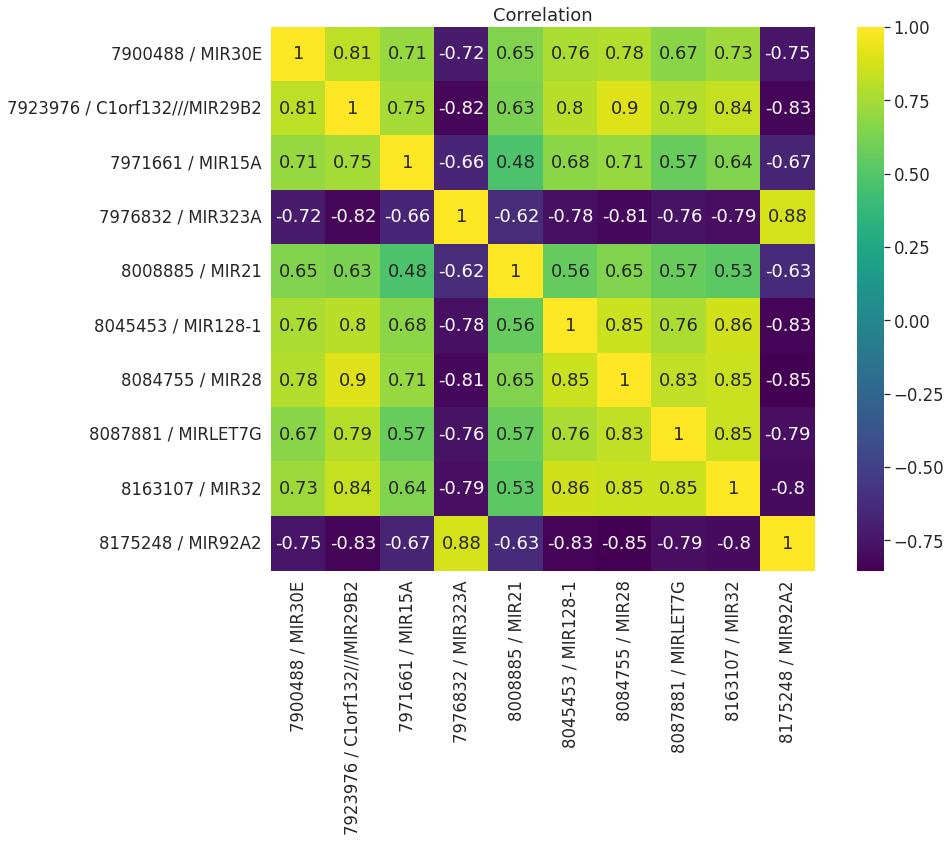

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),vmax=1,square=True, annot=True, cmap='viridis')
plt.title('Correlation')
plt.savefig('corrforall.pdf', bbox_inches='tight')

In [ ]:
df_melt=pd.melt(df, id_vars='MI status')

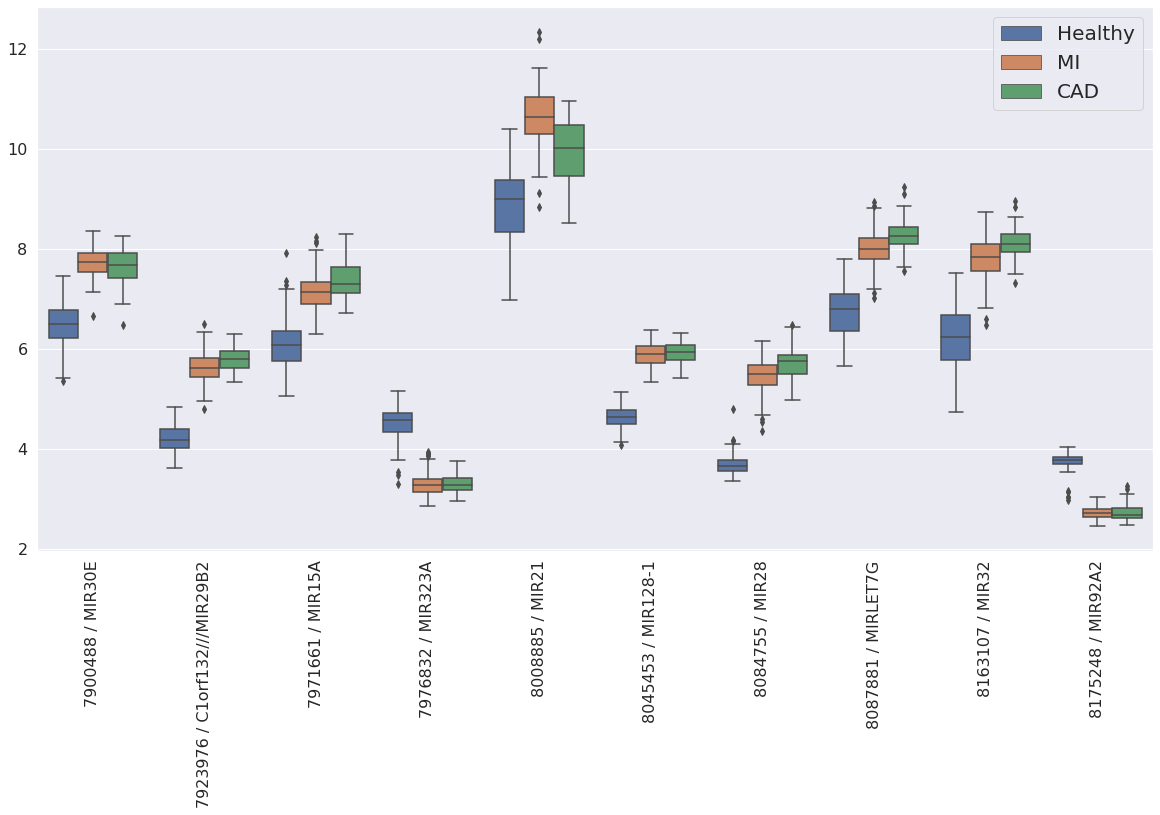

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="variable", y="value", hue='MI status', data=df_melt);
plt.ylabel('', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.legend(loc='upper right', prop={'size':20})
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('Expressionforall.pdf', bbox_inches='tight')

In [ ]:
corr = df.corr()
corr = corr[corr < 1]
corr = corr[corr > -1]
corr[corr >= 0.8].sum()+abs(corr[corr <= -0.8].sum())

7900488 / MIR30E                0.814259
7923976 / C1orf132///MIR29B2    5.002301
7971661 / MIR15A                0.000000
7976832 / MIR323A               2.514856
8008885 / MIR21                 0.000000
8045453 / MIR128-1              3.347095
8084755 / MIR28                 5.097673
8087881 / MIRLET7G              1.678399
8163107 / MIR32                 3.405436
8175248 / MIR92A2               3.394481
dtype: float64

4 microRNA with the highest cprrelation with others have been deleted. By delitation of these miRs, there is no miRs with correlation coefitient more than 0.8 or less than -0.8.

In [79]:
df_new=df.drop(['7923976 / C1orf132///MIR29B2', '8084755 / MIR28', '8163107 / MIR32', '8175248 / MIR92A2'], axis=1)
df_new=df_new.reindex()

In [ ]:
corr = df_new.corr()
corr = corr[corr < 1]
corr = corr[corr > -1]
corr[corr >= 0.8].sum()+abs(corr[corr <= -0.8].sum())

7900488 / MIR30E      0.0
7971661 / MIR15A      0.0
7976832 / MIR323A     0.0
8008885 / MIR21       0.0
8045453 / MIR128-1    0.0
8087881 / MIRLET7G    0.0
dtype: float64

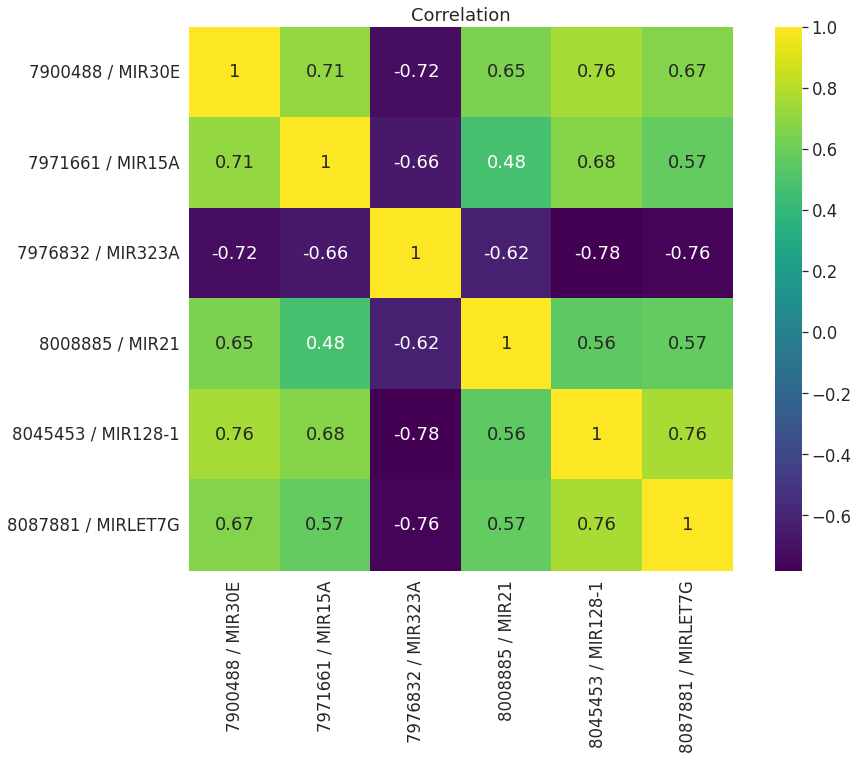

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.heatmap(df_new.corr(),vmax=1,square=True, annot=True, cmap='viridis')
plt.title('Correlation')
plt.savefig('corrfor6.pdf', bbox_inches='tight')

In [ ]:
df_melt=pd.melt(df_new, id_vars='MI status')

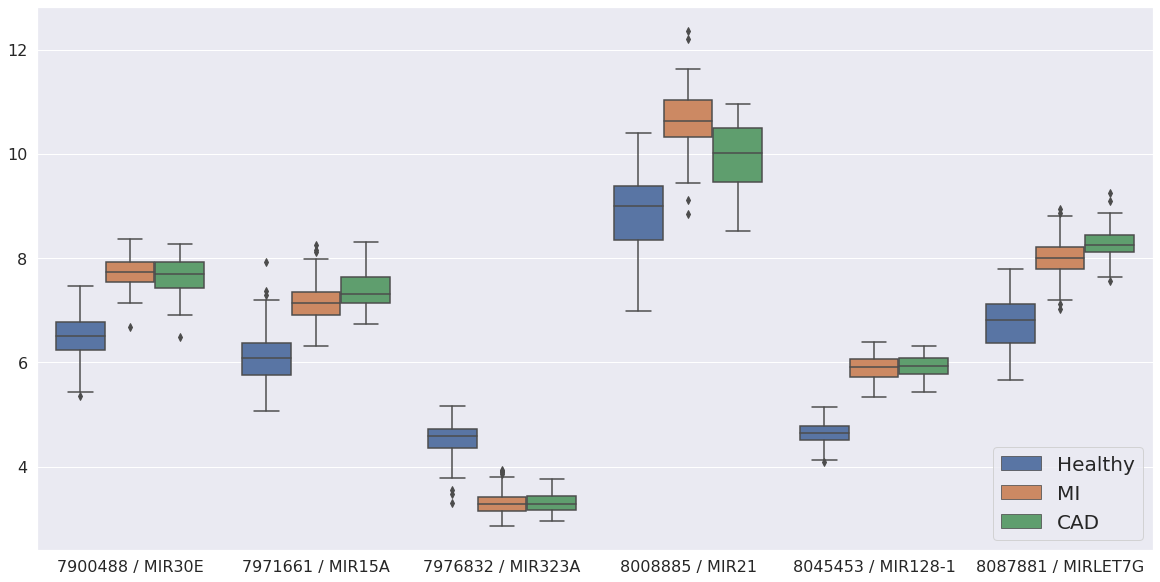

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="variable", y="value", hue='MI status', data=df_melt);
plt.ylabel('', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.legend(loc='lower right', prop={'size':20})
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('Expressionfor6.pdf', bbox_inches='tight')

## Adding a target columns for further use

In [121]:
df_new['H or M/C']=df_new['MI status']
df_new['H or M/C'][df_new['H or M/C'] != 'Healthy'] = 'Not_Healthy'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Healthy or MI/CAD

In [9]:
scoring = ['precision_weighted', 'accuracy']

In [10]:
mirs=list(df_new.columns)[0:5]
result=[]
for mir in mirs:
  X_temp=pd.DataFrame(df_new[mir])
  y_temp = df_new['H or M/C']
  cv=StratifiedKFold(n_splits=10)
  svm=SVC(kernel='linear', random_state=1)
  scores = cross_validate(svm, X_temp, y_temp, scoring=scoring, cv=cv,
                          n_jobs=-1, return_train_score=True)
  scores=pd.DataFrame(scores)
  result.append([mir, list(scores.mean(axis=0))])

In [ ]:
result

[['7900488 / MIR30E',
  [0.006042003631591797,
   0.006659555435180664,
   0.9466103896103896,
   0.9473745210388284,
   0.9440000000000002,
   0.9480000000000001]],
 ['7971661 / MIR15A',
  [0.006650185585021973,
   0.004958343505859375,
   0.9445089542036911,
   0.9520049976637106,
   0.9440000000000002,
   0.952]],
 ['7976832 / MIR323A',
  [0.004904031753540039,
   0.00368654727935791,
   0.9841666666666666,
   0.9796831448792054,
   0.9800000000000001,
   0.979111111111111]],
 ['8008885 / MIR21',
  [0.004537129402160644,
   0.004547834396362305,
   0.8832087960348829,
   0.878586562012765,
   0.852,
   0.8844444444444444]],
 ['8045453 / MIR128-1',
  [0.004358839988708496, 0.0040206432342529295, 1.0, 1.0, 1.0, 1.0]]]

The best candidates are mir-128-1 with all scores equal to 1.0 and mir-323a with scores near 0.98. It should be mentioned that the data is highly imbalanced.

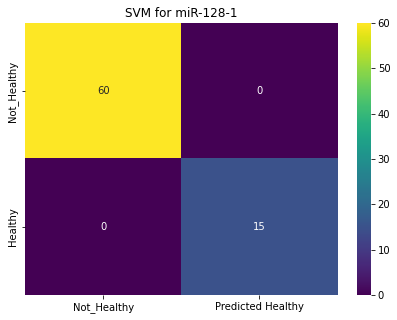

In [63]:
#Confusion Matrix for miR-128-1
X_temp=pd.DataFrame(df_new['8045453 / MIR128-1'])
y_temp = df_new['H or M/C']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp) 
svm=SVC(kernel='linear', random_state=1).fit(X_temp, y_temp)
pred=svm.predict(X_test)
cm=confusion_matrix(y_test,pred,labels=['Not_Healthy', 'Healthy'])
df_cm=pd.DataFrame(cm,index=[i for i in ['Not_Healthy', 'Healthy']],columns=[i for i in ['Not_Healthy', 'Predicted Healthy']])
plt.figure(figsize=(7,5))
plt.title('SVM for miR-128-1')
sns.heatmap(df_cm,annot=True, cmap='viridis');
plt.savefig('CM for H not H by mir-128-1')

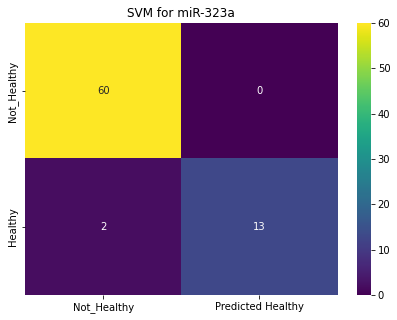

In [64]:
#Confusion Matrix for miR-323a
X_temp=pd.DataFrame(df_new['7976832 / MIR323A'])
y_temp = df_new['H or M/C']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp) 
svm=SVC(kernel='linear', random_state=1).fit(X_temp, y_temp)
pred=svm.predict(X_test)
cm=confusion_matrix(y_test,pred,labels=['Not_Healthy', 'Healthy'])
df_cm=pd.DataFrame(cm,index=[i for i in ['Not_Healthy', 'Healthy']],columns=[i for i in ['Not_Healthy', 'Predicted Healthy']])
plt.figure(figsize=(7,5))
plt.title('SVM for miR-323a')
sns.heatmap(df_cm,annot=True, cmap='viridis');
plt.savefig('CM for H not H by mir-323a')

Just looking to the accuracy of the the 2 mir candidates for classification of Healthy and not_Healthy classes, it seems that there is no big difference between these two mirs. But, looking to the confusion matrix changes the this assumption, since 2 out of 15 healthy samples, were misclassified using mir-323a which results in nearly 15% error. Therefor, it seems that **mir-128-1** is the best choice.

# MI/CAD

In [122]:
df_new.drop('H or M/C', axis=1, inplace=True)
df_mc=df_new[df_new['MI status'] != 'Healthy']
X=df_mc.drop('MI status', axis=1)
y=df_mc['MI status']

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Here, data has been split into train and test sets. The train set would be used for resampling with different algorithms and situations.

In [88]:
resample_set=pd.concat([X_train,y_train],axis=1)
resample_set['MI status'].value_counts()

MI     97
CAD    42
Name: MI status, dtype: int64

## Resampling for handling imbalanced data

### Upsampling and Downsampling

In [89]:
MI=resample_set[resample_set['MI status'] == 'MI']
CAD=resample_set[resample_set['MI status'] == 'CAD']

Different combinations of up and downsampling were tested:

MI=CAD=42

MI=CAD=97

MI=CAD=60

The best scores comes from upsampling of CAD.

In [90]:
more_CAD=resample(CAD,replace=True, n_samples=97, random_state=1)
df_resample=pd.concat([more_CAD,MI])

In [91]:
df_resample['MI status'].value_counts()

CAD    97
MI     97
Name: MI status, dtype: int64

## Training all possible combinations with 3 miRs

In [ ]:
mirs=list(df_resample.columns)[0:6]
listOf3Combinations=[]
for i in range(len(mirs)):
  for j in range(i+1,len(mirs)):
    for k in range(j+1,len(mirs)):
      listOf3Combinations.append([mirs[i], mirs[j], mirs[k]])

len(listOf3Combinations)

20

In [ ]:
#defining scoring for all furthur uses in cross validation
scoring = ['precision_weighted', 'accuracy']

In [ ]:
result3=[]
for i in range(len(listOf3Combinations)):
  X_temp = df_resample[listOf3Combinations[i]]
  y_temp = df_resample['MI status']
  svm=SVC(C=1000, gamma=0.05, kernel='rbf', random_state=1)
  scores = cross_validate(svm, X_temp, y_temp, scoring=scoring, cv=10,
                          n_jobs=-1, return_train_score=True)
  scores=pd.DataFrame(scores)
  result3.append([listOf3Combinations[i], list(scores.mean(axis=0))])

In [ ]:
result3

[[['7900488 / MIR30E', '7971661 / MIR15A', '7976832 / MIR323A'],
  [0.011251044273376466,
   0.004799008369445801,
   0.7440833727675833,
   0.7714697625257865,
   0.7207894736842106,
   0.7594351395730705]],
 [['7900488 / MIR30E', '7971661 / MIR15A', '8008885 / MIR21'],
  [0.01045243740081787,
   0.005459189414978027,
   0.8157646008961799,
   0.8256054187936895,
   0.79,
   0.8219014778325124]],
 [['7900488 / MIR30E', '7971661 / MIR15A', '8045453 / MIR128-1'],
  [0.008855652809143067,
   0.004190921783447266,
   0.7312239660923872,
   0.7449254596570356,
   0.7107894736842104,
   0.732518883415435]],
 [['7900488 / MIR30E', '7971661 / MIR15A', '8087881 / MIRLET7G'],
  [0.008761096000671386,
   0.004410433769226074,
   0.8276787978103768,
   0.8388967191668149,
   0.7981578947368421,
   0.8224367816091954]],
 [['7900488 / MIR30E', '7976832 / MIR323A', '8008885 / MIR21'],
  [0.008860325813293457,
   0.004122090339660644,
   0.7864304993252361,
   0.7904917528610544,
   0.773947368421052

## Training all possible combinations with 4 miRs

In [ ]:
mirs=list(df_resample.columns)[0:6]
listOf4Combinations=[]
for i in range(len(mirs)):
  for j in range(i+1,len(mirs)):
    for k in range(j+1,len(mirs)):
      for h in range(k+1,len(mirs)):
        listOf4Combinations.append([mirs[i], mirs[j], mirs[k], mirs[h]])

len(listOf4Combinations)

15

In [ ]:
#defining scoring for all furthur uses in cross validation
scoring = ['precision_weighted', 'accuracy']

In [ ]:
result4=[]
for i in range(len(listOf4Combinations)):
  X_temp = df_resample[listOf4Combinations[i]]
  y_temp = df_resample['MI status']
  svm=SVC(C=1000, gamma=0.05, kernel='rbf', random_state=1)
  scores = cross_validate(svm, X_temp, y_temp, scoring=scoring, cv=10,
                          n_jobs=-1, return_train_score=True)
  scores=pd.DataFrame(scores)
  result4.append([listOf4Combinations[i], list(scores.mean(axis=0))])

In [ ]:
result4

[[['7900488 / MIR30E',
   '7971661 / MIR15A',
   '7976832 / MIR323A',
   '8008885 / MIR21'],
  [0.009397935867309571,
   0.004411172866821289,
   0.8125366446419078,
   0.8487921239391529,
   0.805,
   0.8482298850574713]],
 [['7900488 / MIR30E',
   '7971661 / MIR15A',
   '7976832 / MIR323A',
   '8045453 / MIR128-1'],
  [0.00951089859008789,
   0.004317951202392578,
   0.7655920103288525,
   0.7716780548867839,
   0.7471052631578947,
   0.762328407224959]],
 [['7900488 / MIR30E',
   '7971661 / MIR15A',
   '7976832 / MIR323A',
   '8087881 / MIRLET7G'],
  [0.01019117832183838,
   0.0040394306182861325,
   0.8343204821494294,
   0.8564183614618063,
   0.8197368421052632,
   0.8505057471264367]],
 [['7900488 / MIR30E',
   '7971661 / MIR15A',
   '8008885 / MIR21',
   '8045453 / MIR128-1'],
  [0.00839405059814453,
   0.004356908798217774,
   0.8203936414462729,
   0.8308681960038566,
   0.8052631578947368,
   0.8299080459770115]],
 [['7900488 / MIR30E',
   '7971661 / MIR15A',
   '8008885 / M

From the model trained for healthy and not_healthy group, we know that mir-128-1 is the best candidates for these two group classification. Therefore, finding a combination with this mir included would be great.

# Best mirs 1:

['7976832 / MIR323A',
   '8008885 / MIR21',
   '8045453 / MIR128-1',
   '8087881 / MIRLET7G']

## Nested Cross_Validation for the best combinations

In [92]:
best_mirs=['7976832 / MIR323A',
   '8008885 / MIR21',
   '8045453 / MIR128-1',
   '8087881 / MIRLET7G']

X_resampled = df_resample[best_mirs]
y_resampled = df_resample['MI status']

In [93]:
# configure the cross-validation procedure
cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [94]:
model = SVC(random_state=1)
param_grid = {
  'C': [100, 500, 1000, 2000,  10000],
  'gamma': [0.01, 0.02, 0.05, 0.07, 0.1],
  'kernel': ['rbf', 'linear', 'sigmoid']
}

In [95]:
search = GridSearchCV(model, param_grid, n_jobs=-1, cv=cv_inner, refit=True)
scores = cross_validate(search, X_resampled, y_resampled, scoring=scoring, 
                        cv=cv_outer, n_jobs=-1, return_train_score=True, 
                        return_estimator =True)

In [96]:
scores=pd.DataFrame(scores)
scores_mean=list(scores.mean(axis=0))
scores_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


[18.512111282348634,
 0.006399822235107422,
 0.8733938136563761,
 0.8850682055279492,
 0.860863697705803,
 0.8789081885856078]

## Finding the best hyperparameter

In [97]:
search = GridSearchCV(model, param_grid, n_jobs=-1, cv=cv_inner, refit=True).fit(X_resampled, y_resampled)

In [98]:
search.best_estimator_

SVC(C=500, gamma=0.1, random_state=1)

In [100]:
svm=search.best_estimator_
scores = cross_validate(svm, X_resampled, y_resampled, scoring=scoring, cv=cv_outer,
                          n_jobs=-1, return_train_score=True)
scores=pd.DataFrame(scores)
scores.mean(axis=0)[2:]

test_precision_weighted     0.860603
train_precision_weighted    0.894565
test_accuracy               0.850607
train_accuracy              0.887916
dtype: float64

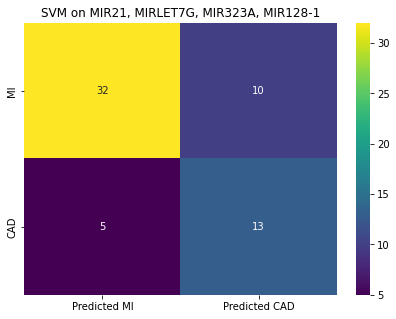

In [102]:
# X_test and y_test are seperated on MI/CAD section of the code.
pred=search.predict(X_test[best_mirs])
cm=confusion_matrix(y_test,pred,labels=['MI', 'CAD'])
df_cm=pd.DataFrame(cm, index=[i for i in ['MI', 'CAD']], columns=[i for i in ['Predicted MI', 'Predicted CAD']])
plt.figure(figsize=(7,5))
plt.title('SVM on MIR21, MIRLET7G, MIR323A, MIR128-1')
sns.heatmap(df_cm,annot=True, cmap='viridis');
plt.savefig('CM for MIR21, MIRLET7G, MIR323A, MIR128-1')

In [103]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         CAD       0.57      0.72      0.63        18
          MI       0.86      0.76      0.81        42

    accuracy                           0.75        60
   macro avg       0.72      0.74      0.72        60
weighted avg       0.77      0.75      0.76        60



## ROC Curve

In [105]:
label = LabelEncoder()

y_temp = label.fit_transform(df_mc['MI status'])
y_temp = pd.get_dummies(y_temp)
y_temp.columns = ['CAD', 'MI']

n_classes = y_temp.shape[1]

In [106]:
search.best_estimator_

SVC(C=500, gamma=0.1, random_state=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_mc[best_mirs], y_temp, test_size=0.3, random_state=27)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(search.best_estimator_)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


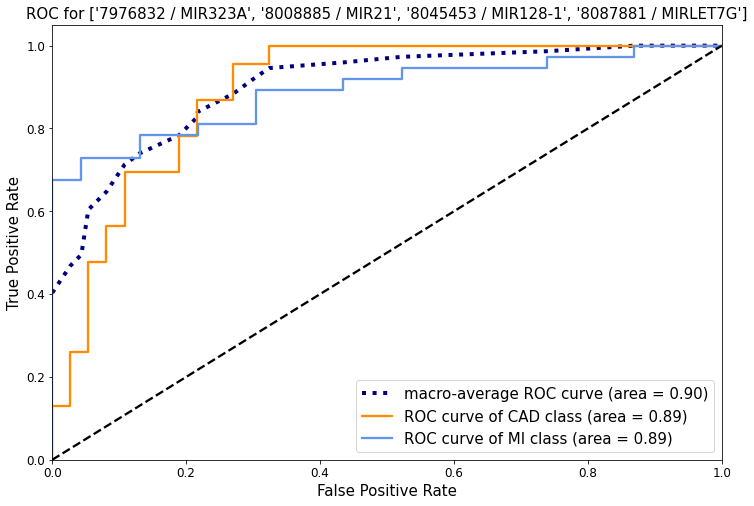

In [108]:
lw = 2.3
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(['darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} class (area = {1:0.2f})'
             ''.format(list(y_temp.columns)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('ROC for {0}'''.format(list(X[best_mirs].columns)), fontsize = 15)
plt.legend(loc="lower right", prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("323a, 21, 128-1, let7g.pdf")

# Best mirs 2:

['7900488 / MIR30E',
   '7971661 / MIR15A',
   '8008885 / MIR21',
   '8087881 / MIRLET7G']

## Nested Cross_Validation for the best combinations

In [124]:
best_mirs=['7900488 / MIR30E',
   '7971661 / MIR15A',
   '8008885 / MIR21',
   '8087881 / MIRLET7G']

X_resampled = df_resample[best_mirs]
y_resampled = df_resample['MI status']

In [125]:
# configure the cross-validation procedure
cv_inner = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [126]:
model = SVC(random_state=1)
param_grid = {
  'C': [100, 500, 1000, 2000,  10000],
  'gamma': [0.01, 0.02, 0.05, 0.07, 0.1],
  'kernel': ['rbf', 'linear', 'sigmoid']
}

In [127]:
search = GridSearchCV(model, param_grid, n_jobs=-1, cv=cv_inner, refit=True)
scores = cross_validate(search, X_resampled, y_resampled, scoring=scoring, 
                        cv=cv_outer, n_jobs=-1, return_train_score=True, 
                        return_estimator =True)

In [128]:
scores=pd.DataFrame(scores)
scores_mean=list(scores.mean(axis=0))
scores_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


[25.47835397720337,
 0.006959056854248047,
 0.8980329187010774,
 0.9286351371063439,
 0.8916329284750336,
 0.9278329197684035]

## Finding the best hyperparameter

In [129]:
search = GridSearchCV(model, param_grid, n_jobs=-1, cv=cv_inner, refit=True).fit(X_resampled, y_resampled)

In [130]:
search.best_estimator_

SVC(C=100, gamma=0.07, random_state=1)

In [131]:
svm=search.best_estimator_
scores = cross_validate(svm, X_resampled, y_resampled, scoring=scoring, cv=cv_outer,
                          n_jobs=-1, return_train_score=True)
scores=pd.DataFrame(scores)
scores.mean(axis=0)[2:]

test_precision_weighted     0.911314
train_precision_weighted    0.912656
test_accuracy               0.907018
train_accuracy              0.912357
dtype: float64

In [ ]:
# X_test and y_test are seperated on MI/CAD section of the code.
pred=search.predict(X_test[best_mirs])
cm=confusion_matrix(y_test,pred,labels=['MI', 'CAD'])
df_cm=pd.DataFrame(cm, index=[i for i in ['MI', 'CAD']], columns=[i for i in ['Predicted MI', 'Predicted CAD']])
plt.figure(figsize=(7,5))
plt.title('SVM on MIR21, MIRLET7G, MIR323A, MIR128-1')
sns.heatmap(df_cm,annot=True, cmap='viridis');
plt.savefig('CM for 30E, 21, 15A, let7g')

In [133]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         CAD       0.67      0.67      0.67        18
          MI       0.86      0.86      0.86        42

    accuracy                           0.80        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.80      0.80      0.80        60



## ROC Curve

In [134]:
label = LabelEncoder()

y_temp = label.fit_transform(df_mc['MI status'])
y_temp = pd.get_dummies(y_temp)
y_temp.columns = ['CAD', 'MI']

n_classes = y_temp.shape[1]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(df_mc[best_mirs], y_temp, test_size=0.3, random_state=27)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(search.best_estimator_)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


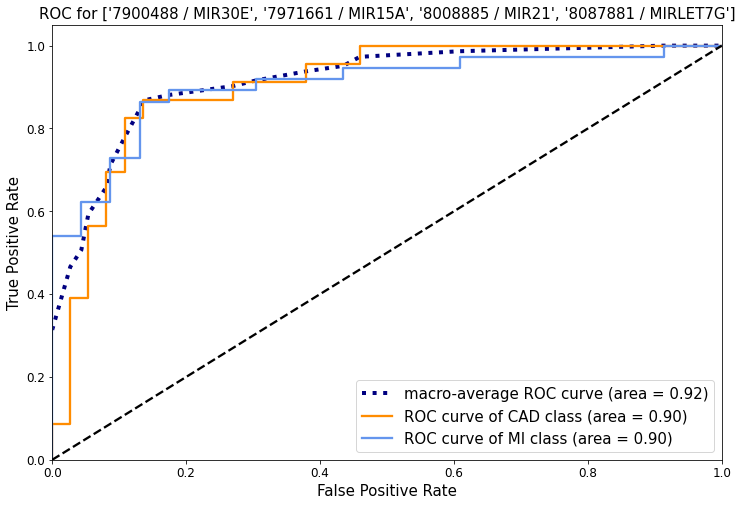

In [138]:
lw = 2.3
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,8))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(['darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} class (area = {1:0.2f})'
             ''.format(list(y_temp.columns)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('ROC for {0}'''.format(list(X[best_mirs].columns)), fontsize = 15)
plt.legend(loc="lower right", prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("30E, 21, 15A, let7g.pdf")